client is a large MNC and they have 9 broad verticals across the organisation..

In [73]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
%matplotlib inline
rcParams['figure.figsize'] = 10,10
rcParams['font.size'] = 15
sns.set_style('whitegrid')
sns.set_palette("pastel")

In [74]:
df=pd.read_csv("C:/Users/lenovo/Downloads/employee_promotion.csv/employee_promotion.csv")

In [6]:
df.head() #print multiple rows

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [7]:
df.shape #function that prints the number of row and columns in table

(54808, 13)

In [76]:
df.info() #verify data and verify its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [51]:
df.isna().any() #That there are no null values in the data

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
awards_won              False
avg_training_score       True
is_promoted             False
dtype: bool

In [52]:
df['previous_year_rating'].fillna(0,inplace=True)

In [53]:
df.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
awards_won              False
avg_training_score       True
is_promoted             False
dtype: bool

In [54]:
df['avg_training_score'].fillna(0,inplace=True)
df.isna().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
awards_won              False
avg_training_score      False
is_promoted             False
dtype: bool

In [55]:
df['education'].fillna(0,inplace=True)
df.isna().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
awards_won              False
avg_training_score      False
is_promoted             False
dtype: bool

In [8]:
num_col=df._get_numeric_data().columns #num columns

In [9]:
num_col

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [10]:
len(num_col) #Length

8

In [11]:
NUM=df[num_col]

In [12]:
NUM.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,1,35,5.0,8,0,49.0,0
1,65141,1,30,5.0,4,0,60.0,0
2,7513,1,34,3.0,7,0,50.0,0
3,2542,2,39,1.0,10,0,50.0,0
4,48945,1,45,3.0,2,0,73.0,0


In [13]:
cat_col=[col for col in df.columns if col not in NUM] #data object

In [56]:
cat_col

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [57]:
len(cat_col)

5

In [58]:
H=df[cat_col]

In [59]:
H.sample(3)

,department,region,education,gender,recruitment_channel
498,Operations,region_16,Bachelor's,m,other
40268,Technology,region_12,Bachelor's,m,other
53450,Analytics,region_25,Master's & above,m,other


In [60]:
df.dtypes.value_counts() #data type

int64      6
object     5
float64    2
dtype: int64

In [62]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won                int64
avg_training_score      float64
is_promoted               int64
dtype: object

In [63]:
df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [27]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [64]:
df.describe().style.background_gradient(cmap = 'copper') #descriptive statistics

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.023172,60.736334,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.150450,18.842781,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,50.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,59.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [65]:
min=df['length_of_service'].min() #descriptive statistics

In [66]:
min

1

In [67]:
df.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,4,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [68]:
count=df['department'].count()

In [69]:
count

54808

Data visualization

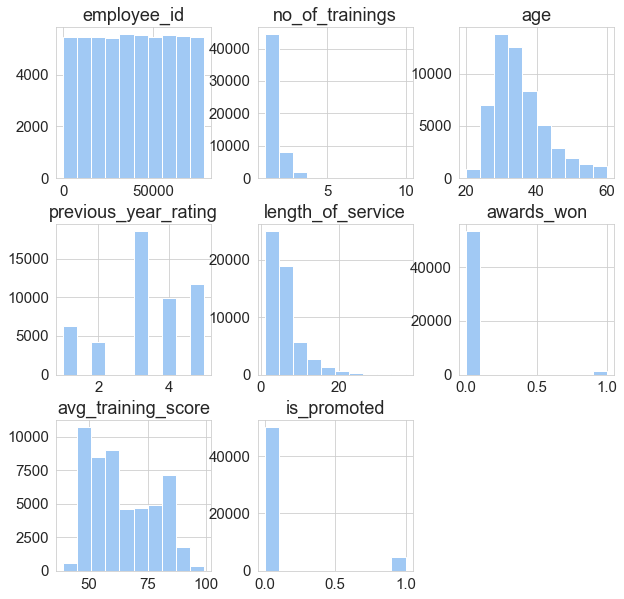

In [70]:
NUM.hist(figsize=(10,10)); 

<AxesSubplot:>

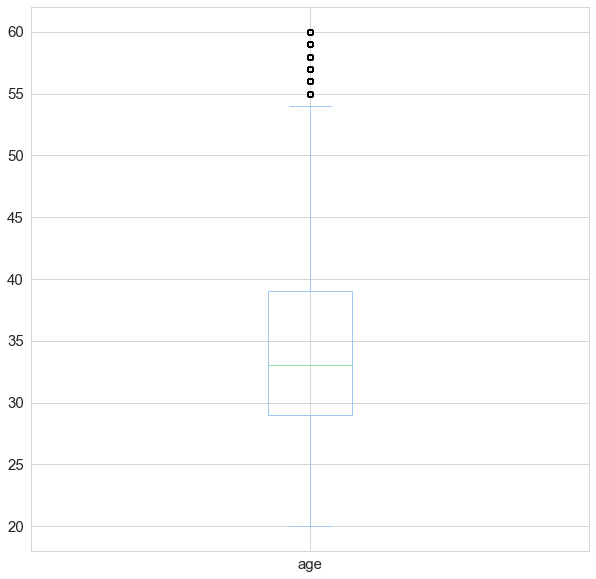

In [71]:
df['age'].plot(kind='box')

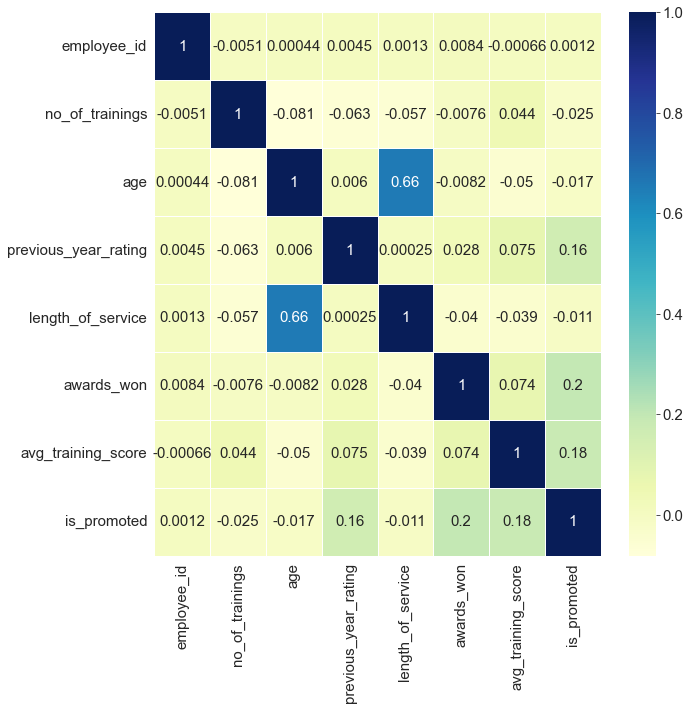

In [77]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,linewidths=.5, ax=ax, cmap="YlGnBu");